# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Data/SeoulBikeData.csv', encoding= 'unicode_escape')

# 1. Data Summary

In [4]:
# Top 5 instances of the data.
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Last 5 rows of dataset

In [6]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

From above, we can see there is no NaN values.

In [8]:
# description of the data including categorical data.
dataset.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [9]:
# Shape of data
dataset.shape

(8760, 14)

#EDA

In [10]:
# Count the number of instances corresponding to each hour.
dataset['Hour'].value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

In [11]:
# Calculate the mean of 'rented bike count' corresponding to each hour of day over the year.
dataset.groupby('Hour')['Rented Bike Count'].mean()

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

High demands : 18>19>17>20>21>8>... .


Demand is more in the evening hours and in morning
at 8.


Lowest demands are in the early morning (3>5>4).

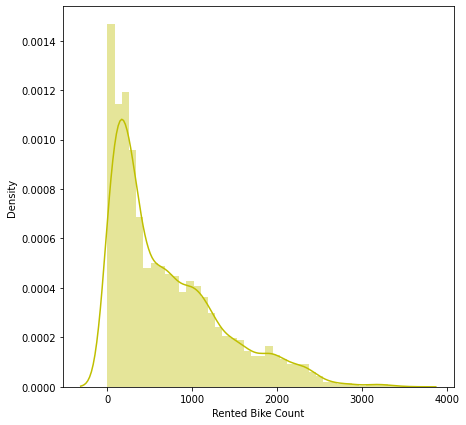

In [12]:
# dependent variable Rented Bike Count
plt.figure(figsize=(7,7))
sns.distplot(dataset['Rented Bike Count'], color ='y')

In [13]:
# Numerical features

numerical_features = dataset.describe().columns

In [14]:
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

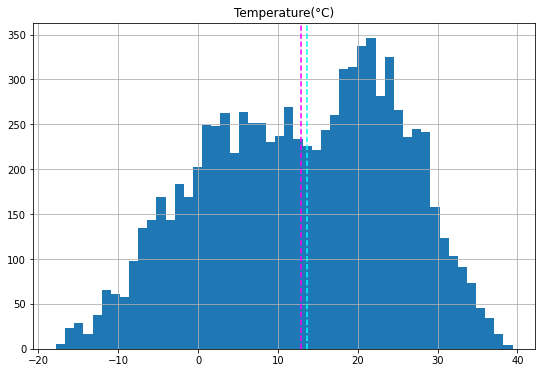

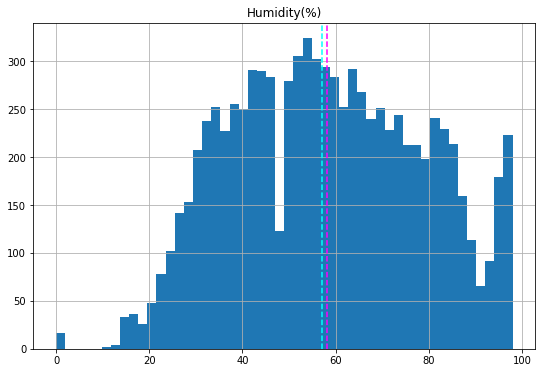

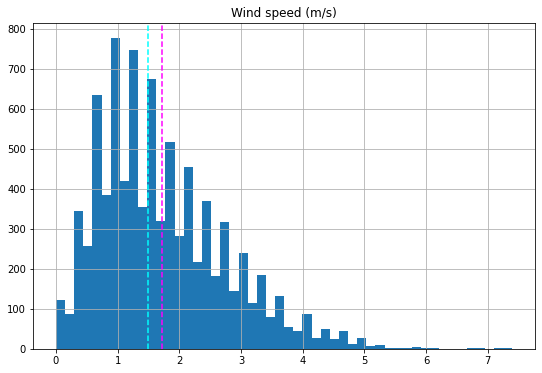

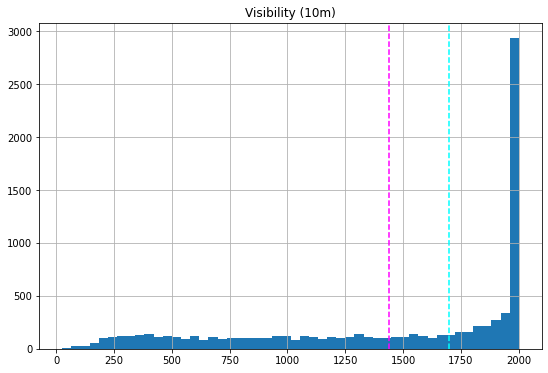

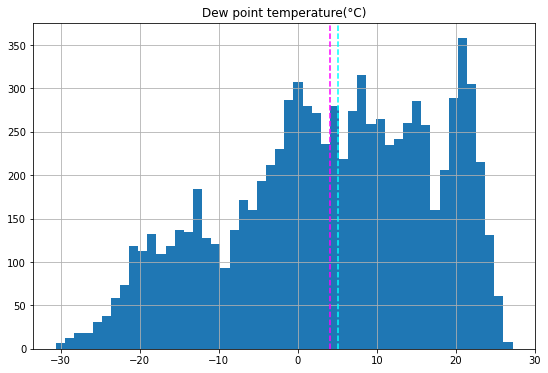

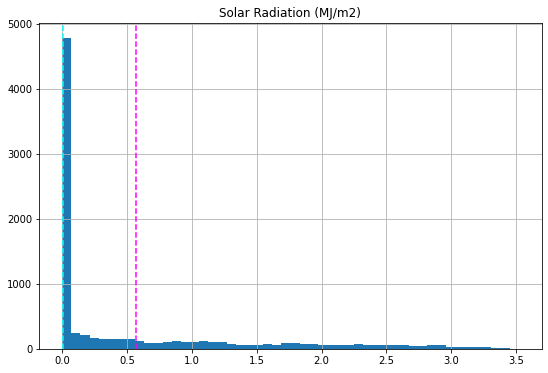

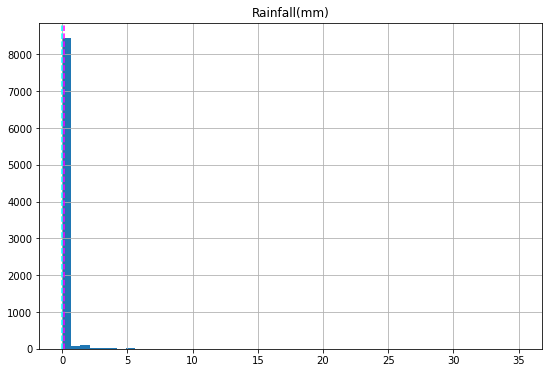

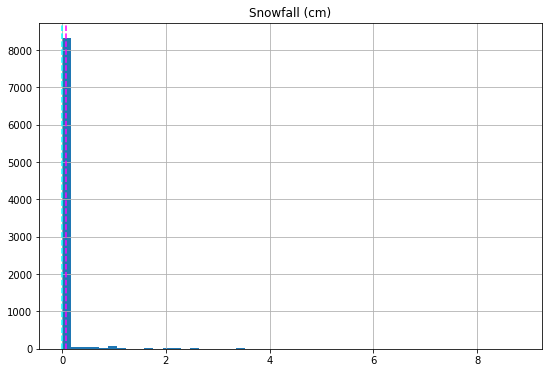

In [15]:
# Let's see among the numerical features(independent features) one that following normal disribution
# features plot shows the yearly distribution(from dec 2017 to nov 2018) at zero hour. 
for fea in numerical_features[2:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = dataset[fea]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='--')
  ax.axvline(feature.median(), color='cyan', linestyle='--')
  ax.set_title(fea)
plt.show()


In [16]:
dataset['Visibility (10m)'].value_counts()

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: Visibility (10m), Length: 1789, dtype: int64

In [17]:
dataset['Visibility (10m)'].mean()

1436.825799086758

In [18]:
dataset[dataset['Visibility (10m)']>1436.825799086758]['Rented Bike Count']

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 5166, dtype: int64

In [19]:
dataset[dataset['Visibility (10m)']>1436.825799086758]['Rented Bike Count'].mean()

784.5782036391793

In [20]:
dataset[dataset['Visibility (10m)']<1436.825799086758]['Rented Bike Count']

16       484
22       398
23       323
24       328
25       308
        ... 
8744    1527
8745     809
8746     554
8747     642
8748     720
Name: Rented Bike Count, Length: 3594, dtype: int64

In [21]:
dataset[dataset['Visibility (10m)']<1436.825799086758]['Rented Bike Count'].mean()

589.6446855870896

Visibility has not much effect on number of bikes rented.

In [22]:
dataset['Rainfall(mm)'].value_counts()

# out of total 8760 instances 0.0 mm rainfall for 8232 instances.

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: Rainfall(mm), Length: 61, dtype: int64

In [23]:
dataset[dataset['Rainfall(mm)']>8]['Rented Bike Count']

564       4
2154     11
2157     10
2256     22
2505     32
3997    151
4012     51
4016    152
4017     28
4028     17
4687     94
4688    187
4708     72
4978      9
4979     11
4981     24
5034    596
5098     13
5099     11
5132     61
5305     39
6493     31
6498     96
6500     10
6501    122
6524     19
6641     23
6642    113
7422      0
7423      5
7424      6
8223     56
8226     40
8229     21
8232      0
8601     24
Name: Rented Bike Count, dtype: int64

In [24]:
dataset[dataset['Rainfall(mm)']>8]['Rented Bike Count'].mean()

60.02777777777778

In [25]:
dataset[dataset['Rainfall(mm)']<8]['Rented Bike Count']

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8721, dtype: int64

In [26]:
dataset[dataset['Rainfall(mm)']<8]['Rented Bike Count'].mean()

707.4854947827084

Rainfall has significant effect on the number of bikes rented.

In [27]:
dataset['Rainfall(mm)'].var()

1.2728193746967844

In [28]:
dataset['Wind speed (m/s)'].value_counts()

1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: Wind speed (m/s), Length: 65, dtype: int64

In [29]:
dataset[dataset['Wind speed (m/s)']>5]['Rented Bike Count'].mean()

591.4857142857143

In [30]:
dataset[dataset['Wind speed (m/s)']<5]['Rented Bike Count'].mean()

705.1474977043159

Wind speed not have significant effect. We can ignore this feature.

In [31]:
dataset['Wind speed (m/s)'].var()

1.0739176763261125

In [32]:
dataset[dataset['Snowfall (cm)']>5]['Rented Bike Count'].mean()

111.66666666666667

In [33]:
dataset[dataset['Snowfall (cm)']<5]['Rented Bike Count'].mean()

705.1268281535649

Snow has large effect.

# Correlation 

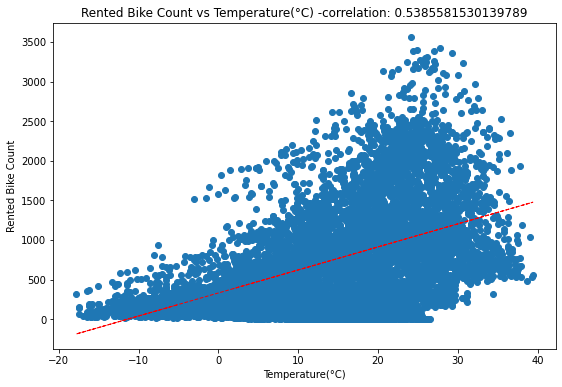

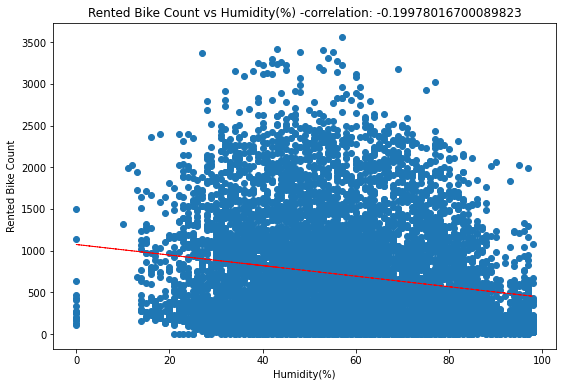

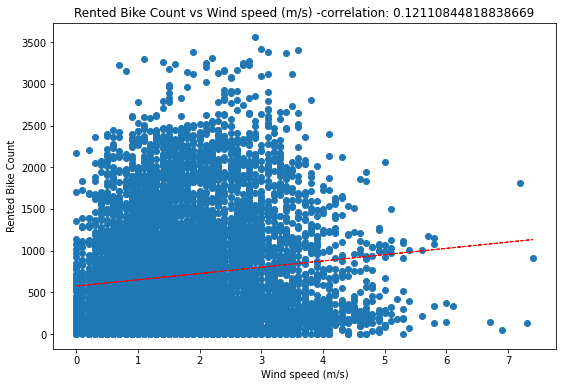

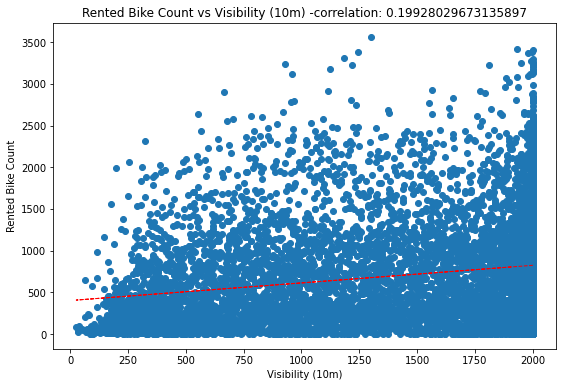

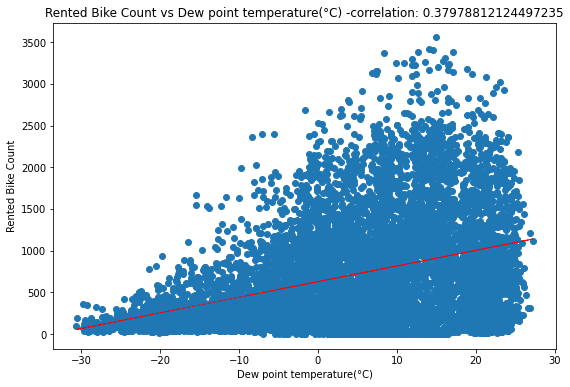

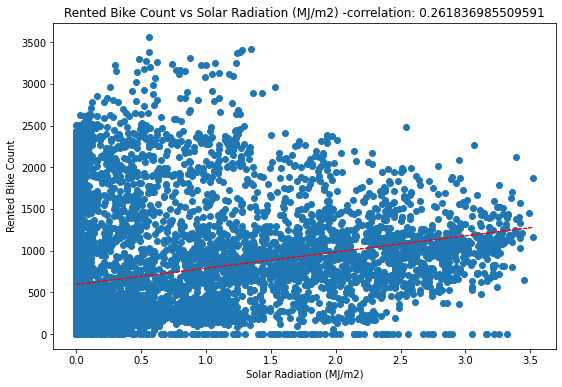

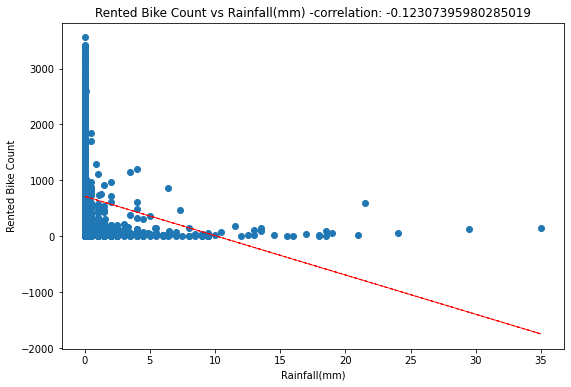

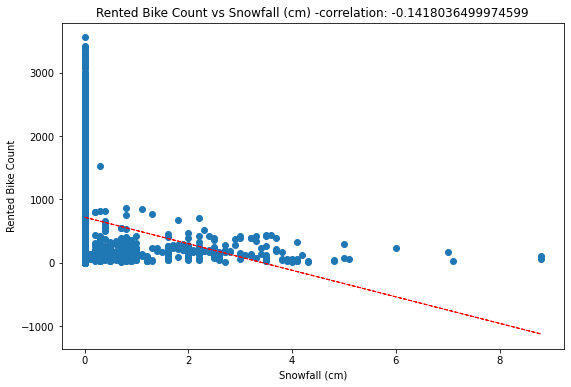

In [34]:
corr_dict = {}
for fea in numerical_features[2:]:
  
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = dataset[fea]
  label = dataset['Rented Bike Count']
  correlation = feature.corr(label)
  corr_dict[fea] = correlation
  plt.scatter(x=feature, y= label)
  plt.xlabel(fea)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs '+fea+' -correlation: '+str(correlation))
  z = np.polyfit(dataset[fea], dataset['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(dataset[fea])

  plt.plot(dataset[fea], y_hat, 'r--', lw=1)
plt.show()

In [35]:
corr_dict

{'Dew point temperature(°C)': 0.37978812124497235,
 'Humidity(%)': -0.19978016700089823,
 'Rainfall(mm)': -0.12307395980285019,
 'Snowfall (cm)': -0.1418036499974599,
 'Solar Radiation (MJ/m2)': 0.261836985509591,
 'Temperature(°C)': 0.5385581530139789,
 'Visibility (10m)': 0.19928029673135897,
 'Wind speed (m/s)': 0.12110844818838669}

By observation, we can say 'Temperature(°C)' has relevent relation with 'Rented Bike Count'.

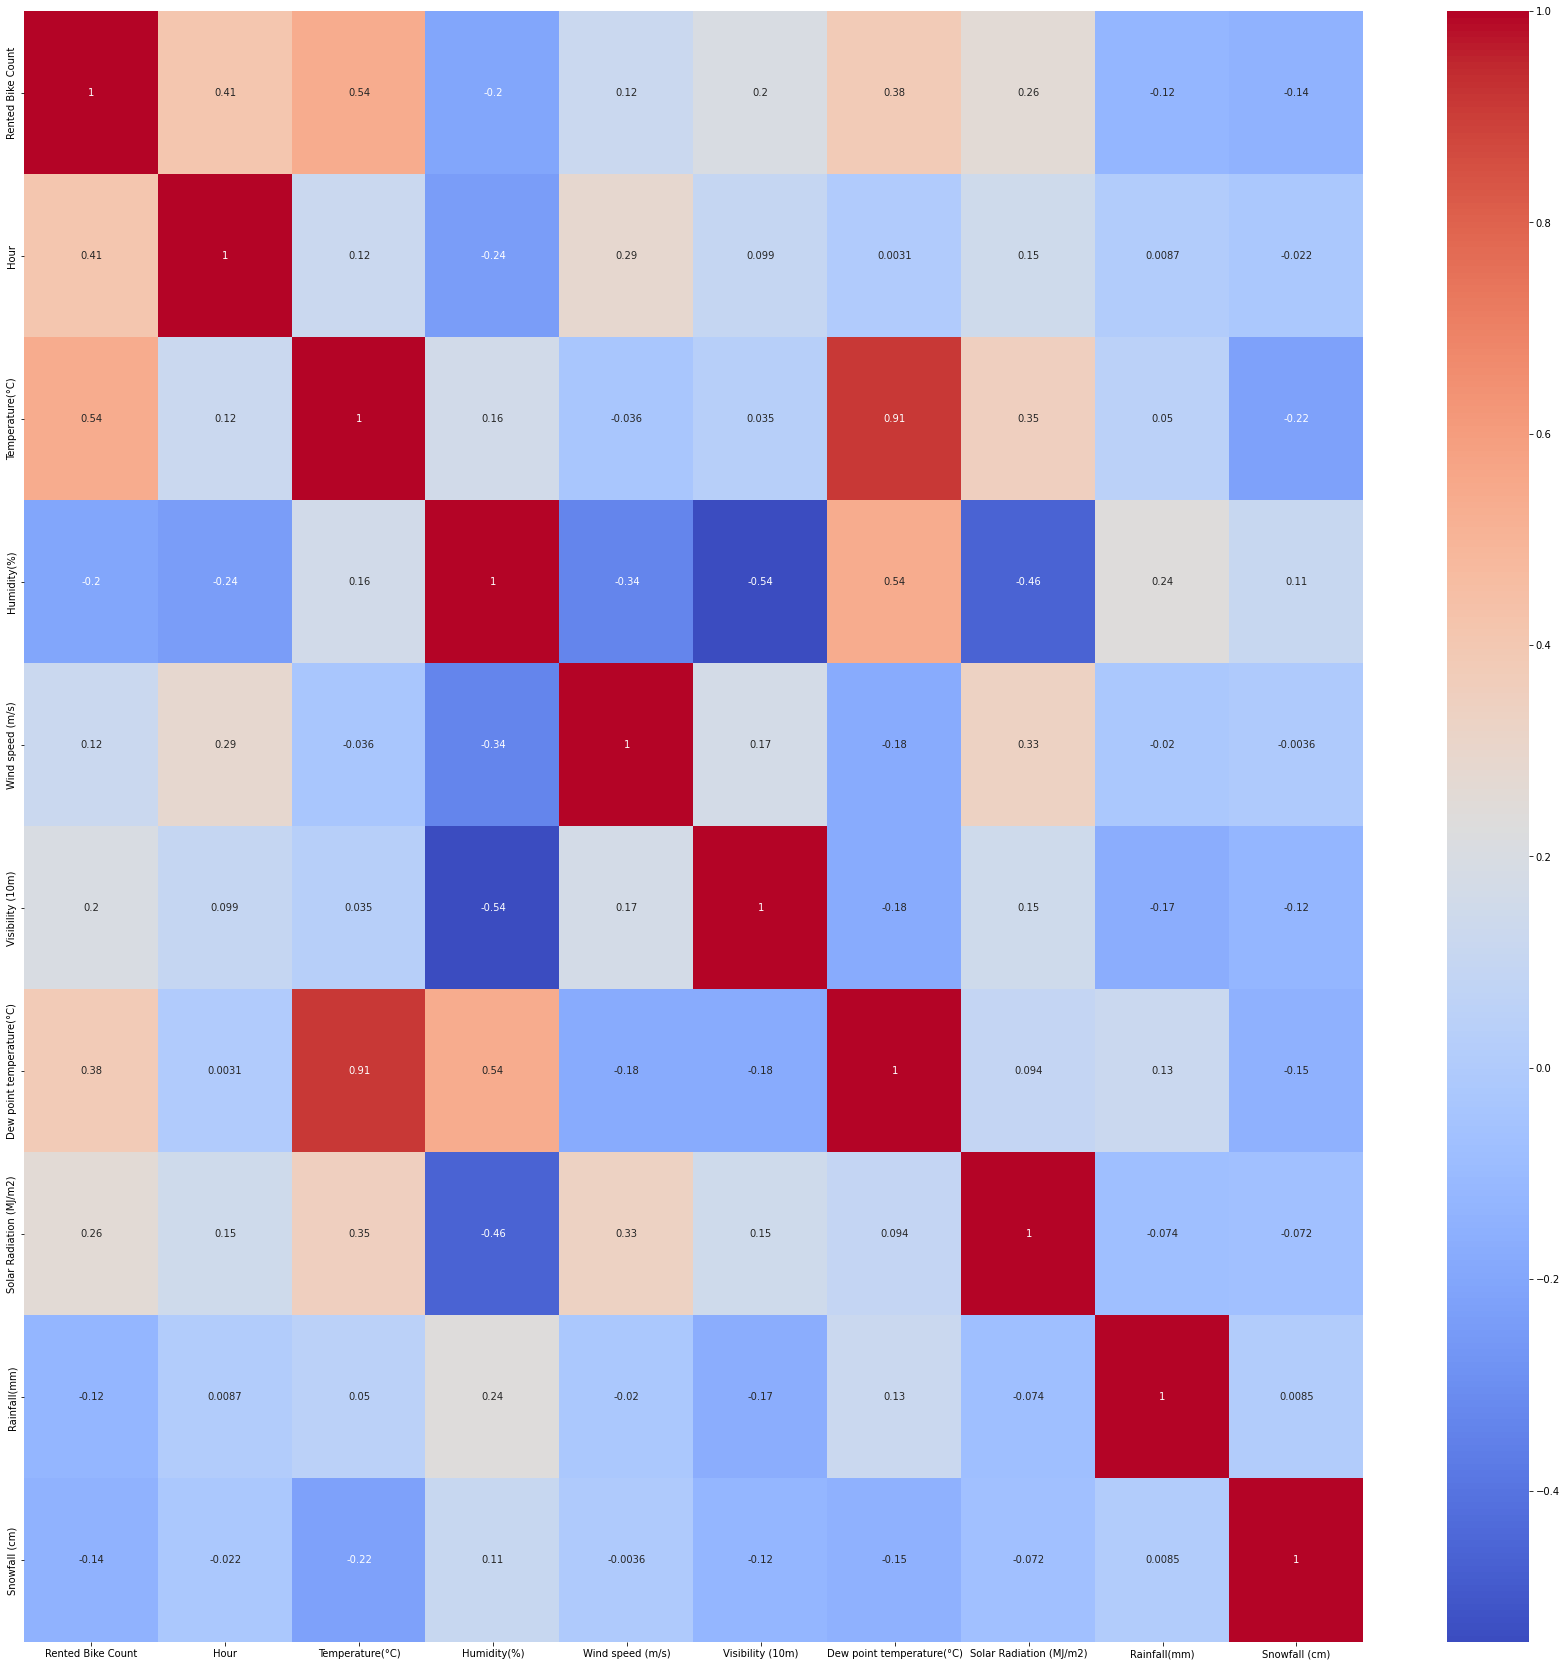

In [36]:
# Heatmap

plt.figure(figsize =(30,30))
correlation = dataset.corr()
sns.heatmap(correlation, annot=True, cmap ='coolwarm')

In [37]:
numerical_features = numerical_features.tolist()

In [38]:
print(numerical_features)

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


'Temperature(°C)' and 'Dew point temperature(°C)' are significantly related with each other. Therefore we can combine them using weighted average, weight are define according to their relation with 'rented bike count'.

In [39]:
dataset['temp_dewtemp'] =  0.6*dataset['Temperature(°C)'] + 0.4*dataset['Dew point temperature(°C)']

In [40]:
dataset['temp_dewtemp_70'] =  0.7*dataset['Temperature(°C)'] + 0.3*dataset['Dew point temperature(°C)']

Similarly, we combine 'Rainfall(mm)' and 'Snowfall(cm)'.

In [41]:
dataset['rain_snow_fall'] =  0.35*dataset['Rainfall(mm)'] + 0.65*dataset['Snowfall (cm)']

Check VIF score for multicollinearity.

In [42]:
# Multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [43]:
dataset.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'temp_dewtemp', 'temp_dewtemp_70', 'rain_snow_fall'],
      dtype='object')

Calculating VIF for all columns excluding 'Temperature(°C)', 'Dew point temperature(°C)', 'Rainfall(mm)', 'Snowfall (cm)','Humidity(%)' and 'Rented Bike Count'; because we have taken combine features.

In [44]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Temperature(°C)', 'temp_dewtemp','Dew point temperature(°C)', 'Rainfall(mm)', 'Snowfall (cm)','Humidity(%)', 'Rented Bike Count']]])


,variables,VIF
0,Hour,3.780990
1,Wind speed (m/s),4.276238
2,Visibility (10m),4.008994
3,Solar Radiation (MJ/m2),1.794356
4,temp_dewtemp_70,1.775170
5,rain_snow_fall,1.049715


Variables' VIF values are under 5. Means they are non corelated.

# Categorical Features

In [45]:
# Categorical features

categorical_features = dataset.describe(include=['object', 'category']).columns

In [46]:
categorical_features.tolist()

['Date', 'Seasons', 'Holiday', 'Functioning Day']

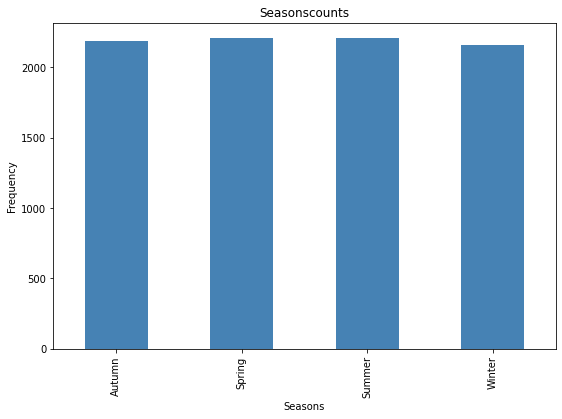

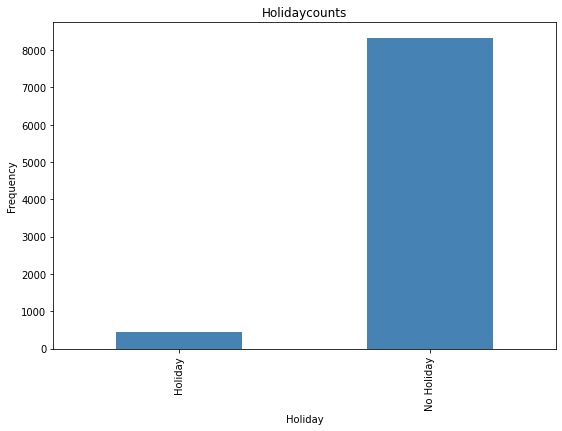

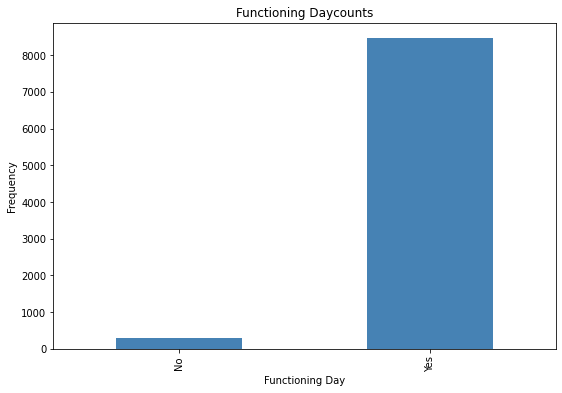

In [47]:
for col in categorical_features[1:]:
  counts = dataset[col].value_counts().sort_index()
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  counts.plot.bar(ax=ax, color='steelblue')
  ax.set_title(col+'counts')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
plt.show()


Data points are equally distributed over all seasons.

In [48]:
dataset['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Here (of course) holidays are less in number, but bikes rented get effected by holidays. 

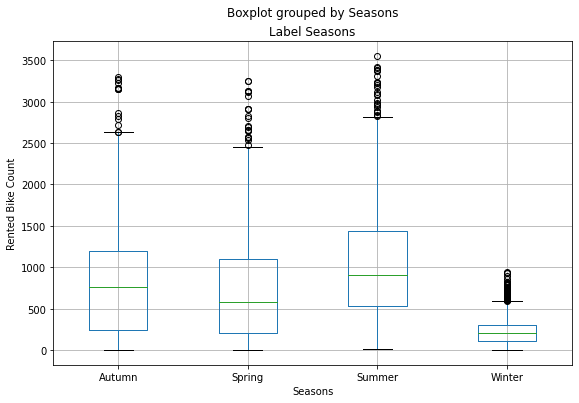

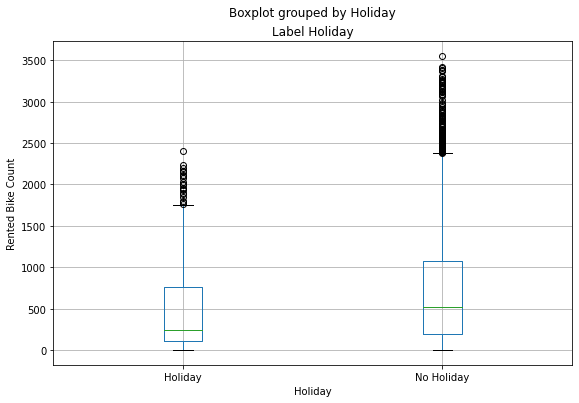

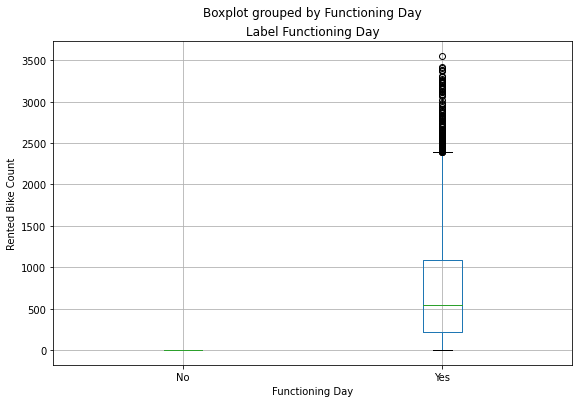

In [49]:
for col in categorical_features[1:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  dataset.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
  ax.set_title('Label '+col)
  ax.set_ylabel('Rented Bike Count')
plt.show()

Here we can observe outliers. We can't remove these outliers:

1. In seasons box plot outliers represents, the odd days (some natural weather changes), it decreases the number of rented bikes. If we remove this outliers then we can have only normal/usual weather days, implies prediction is based on usual days. 

2. Similarly for holidays, while training we have to capture Holidays also.
3. Similarly for functioning days.

In [50]:
## Data encoding

encoders_num = {'Holiday':{'Holiday':1, 'No Holiday':0},
                'Functioning Day':{'No':1, 'Yes':0},
                # 'Rented Bike Count':{(0,1,2,3,4,5):0,  (6,7,8,9,10,11):1, (12,13,14,15,16,17):2, (18,19,20,21,22,23,24):3}
                }

In [51]:
dataset = dataset.replace(encoders_num)

In [52]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,temp_dewtemp,temp_dewtemp_70,rain_snow_fall
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,0,-10.16,-8.92,0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,0,-10.34,-9.13,0.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,0,-10.68,-9.51,0.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,0,-10.76,-9.62,0.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,0,-11.04,-9.78,0.0


In [53]:
# One hot encoding

dataset = pd.get_dummies(dataset, columns = ['Hour'], prefix = ['hour'])

In [54]:
dataset.head()

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,01/12/2017,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,01/12/2017,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,01/12/2017,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,01/12/2017,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,01/12/2017,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
dataset['hoilday_plus_nofunc'] = dataset['Holiday'] + dataset['Functioning Day']

In [56]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'temp_dewtemp', 'temp_dewtemp_70',
       'rain_snow_fall', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'hoilday_plus_nofunc'],
      dtype='object')

We have combine some hours using correlation to reduce number of features.

In [57]:
dataset['hour_01'] = dataset['hour_0']  + dataset['hour_1']
dataset['hour_23'] = dataset['hour_2'] + dataset['hour_3']
dataset['hour_456'] =dataset['hour_4'] + dataset['hour_5'] +dataset['hour_6']
dataset['hour_9to14'] = 0.1*dataset['hour_9'] + 0.03*dataset['hour_10'] +0.07*dataset['hour_11']+ .2*dataset['hour_12'] + 0.2*dataset['hour_13'] +0.4*dataset['hour_14']
dataset['hour_15to21'] = dataset['hour_15'] + dataset['hour_16'] +dataset['hour_17']


# Features

In [58]:
Features = ['Humidity(%)', 'temp_dewtemp_70', 'rain_snow_fall',
             'Holiday', 'Functioning Day' ,'hour_01', 'hour_456', 'hour_7', 'hour_8' , 'hour_9' , 'hour_14','hour_22', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_23', 'hour_2', 'hour_3', 'hour_22'
            ]

In [59]:
len(Features)

20

Train test data

In [60]:
from scipy.stats import zscore

X = dataset[Features].apply(zscore)

In [61]:
# rented bike count isa right skewed
y = dataset['Rented Bike Count']

Train Test Split

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 20)
(1752, 20)


Training

In [63]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(X_train, y_train)

In [64]:
reg.score(X_train, y_train)

0.6096701124558113

In [65]:
reg.coef_

array([-1.89266232e+02,  3.67808142e+02, -5.65570124e+01, -3.26687396e+01,
       -1.42328445e+02, -1.60319423e+01, -9.21572945e+01,  2.80281018e+01,
        9.57457549e+01,  1.51273598e+01, -2.02966483e+01,  5.48956509e+14,
        1.52477252e+02,  9.69840118e+01,  8.27754679e+01,  8.08602774e+01,
        2.60445405e+15, -1.88301717e+15, -1.88301717e+15, -5.48956509e+14])

In [66]:
len(reg.coef_)

20

In [67]:
reg.intercept_

709.2503935234731

In [68]:
y_pred = reg.predict(X_test)

In [69]:
y_pred

array([233.62539352, 605.43789352, 341.54726852, ..., 340.78164352,
       950.25039352, 499.67226852])

In [70]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)

In [75]:
print('MSE: ', MSE)


MSE:  165112.42743488195


In [76]:
RMSE = np.sqrt(MSE)
print('RMSE: ', RMSE)

RMSE:  406.34028527194044


In [73]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2: ', r2)


R2:  0.6054874169524329


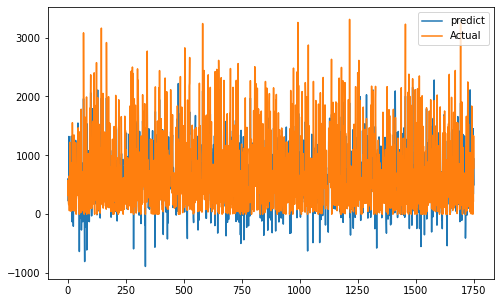

In [74]:
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(['predict', 'Actual'])
plt.show()

# Lasso Regression

In [77]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001, max_iter = 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [78]:
lasso.score(X_train, y_train)

0.6096741833931586

In [79]:
lasso.coef_

array([-189.53507727,  367.72841273,  -56.34686552,  -32.81224158,
       -142.3102473 ,  -16.08034951,  -92.25139549,   27.74162948,
         96.26151475,   15.20151782,  -20.30396508,   50.75070659,
        152.34401802,   96.90903453,   82.97436851,   81.11966736,
        -69.12675112,    6.94083601,   -7.30465997,   13.16968419])

# Cross Validation

In [82]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [83]:
print('The best fit alpha value is found out to be : ', lasso_regressor.best_params_)

The best fit alpha value is found out to be :  {'alpha': 0.1}


In [84]:
y_pred_lasso = lasso_regressor.predict(X_test)

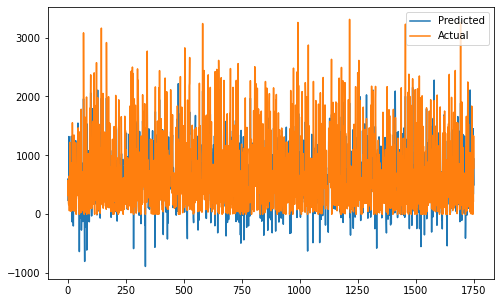

In [86]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(['Predicted', 'Actual'])
plt.show()